In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

Shape of data and its datatypes

In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#there are no null values

Statistical Summary

In [6]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

In [7]:
# duration features mean and max value difference shows data is skewed
#product related page is visited by the user more than anyother page
#user visited the website has less influence with respect to special day

In [8]:
df.describe(include=['object','bool'])

Month        VisitorType Weekend Revenue
count   12330              12330   12330   12330
unique     10                  3       2       2
top       May  Returning_Visitor   False   False
freq     3364              10551    9462   10422

In [9]:
#high visiting month is may
#not generating revenue is more,shows there is imbalance in data,out of 12330,not revenue is 10422 
#people visitng the page in weekday is more than weekend


In [10]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Null Values detection

In [11]:
print(pd.DataFrame({'count':df.isnull().sum(),'percentage':df.isnull().sum()/df.shape[0]}))

                         count  percentage
Administrative               0         0.0
Administrative_Duration      0         0.0
Informational                0         0.0
Informational_Duration       0         0.0
ProductRelated               0         0.0
ProductRelated_Duration      0         0.0
BounceRates                  0         0.0
ExitRates                    0         0.0
PageValues                   0         0.0
SpecialDay                   0         0.0
Month                        0         0.0
OperatingSystems             0         0.0
Browser                      0         0.0
Region                       0         0.0
TrafficType                  0         0.0
VisitorType                  0         0.0
Weekend                      0         0.0
Revenue                      0         0.0


In [12]:
#there are no null values

Skewness

In [13]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [14]:
#there are features with high skewness durations,page_values
#there are features with moderate skewness bounce_rates,exit_rates

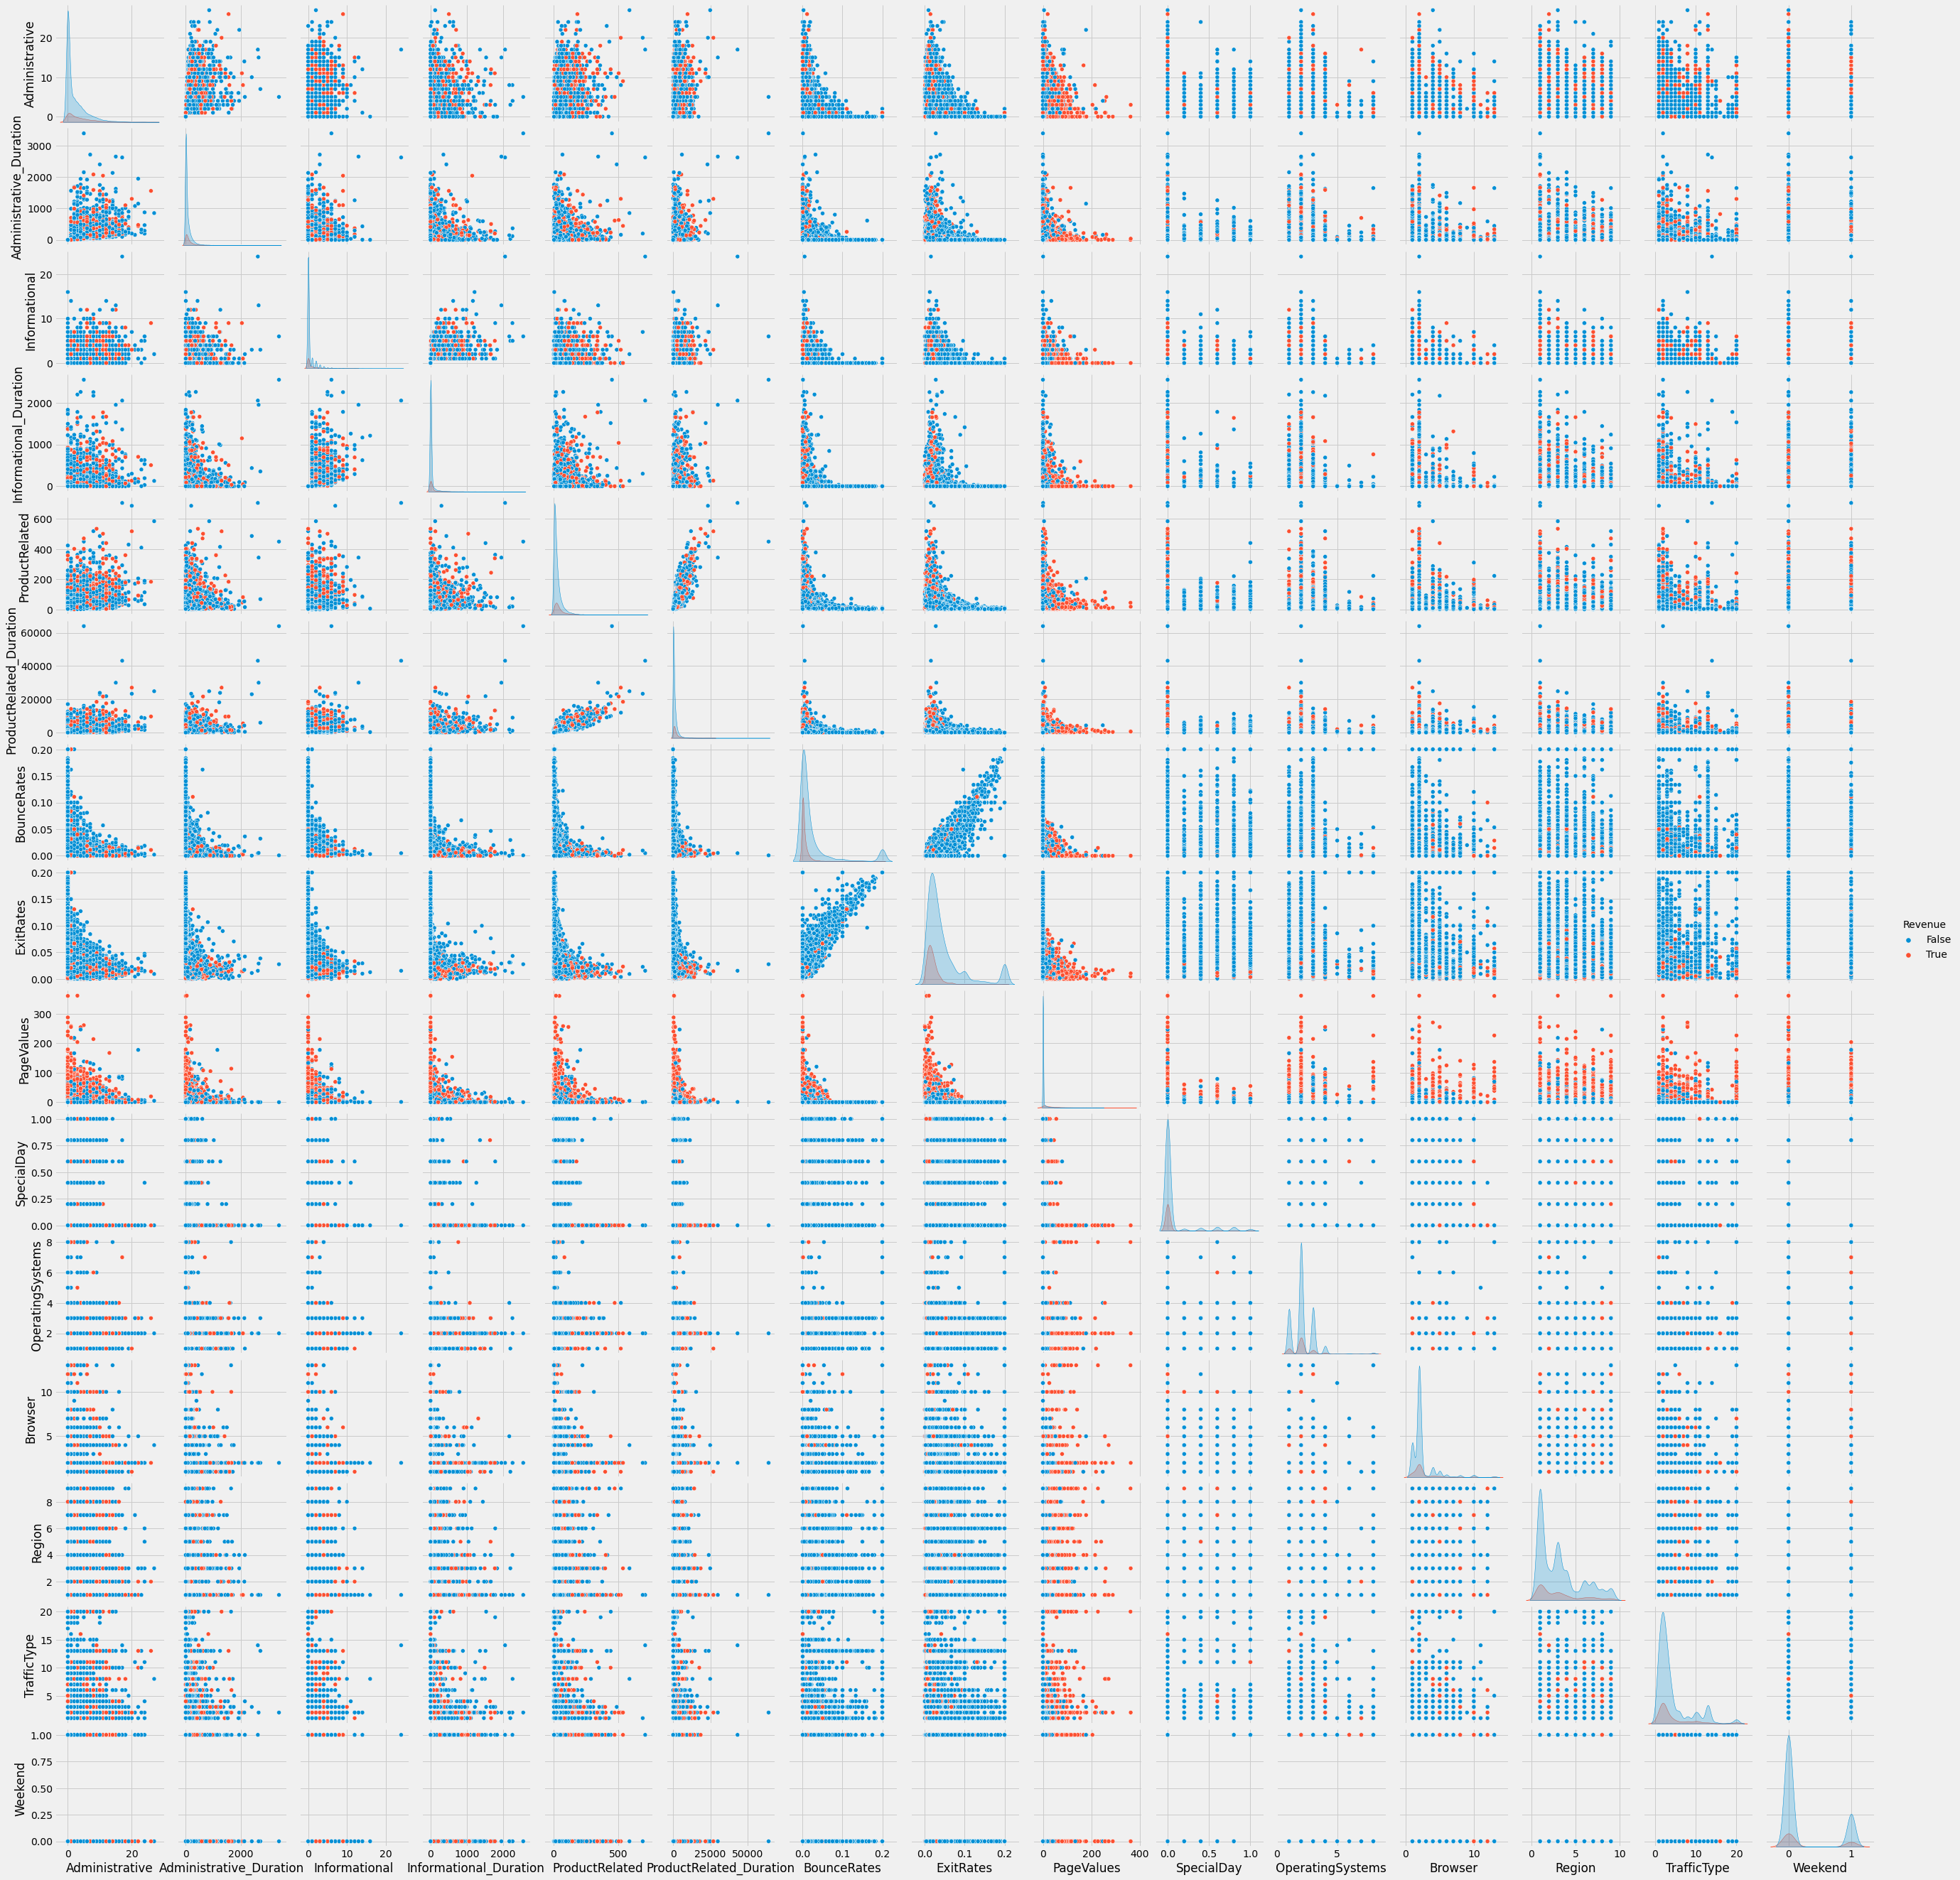

In [100]:
sns.pairplot(df,hue='Revenue')
plt.show()

EDA

Univariate Analysis

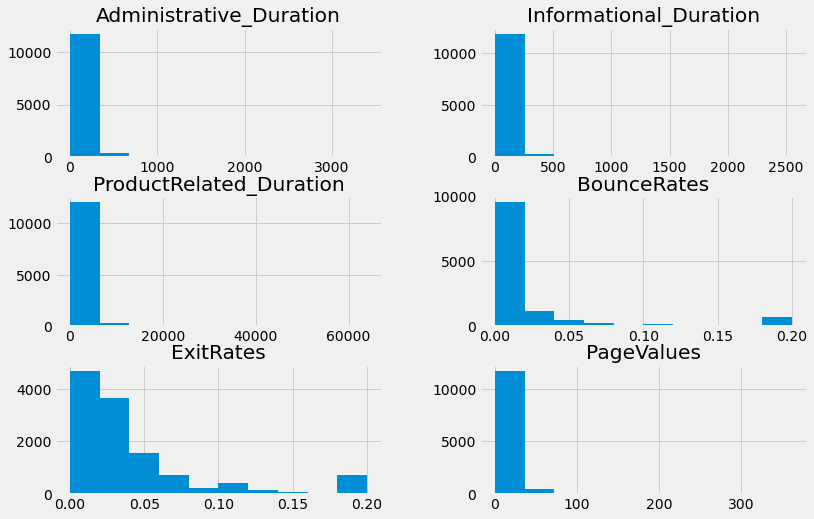

In [18]:
#numerical features
num=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
df.hist(column=num)
plt.show()

In [16]:
#we can see the right skewed distribution
#there are outliers in exit rates and bounce rates,shows there are some unusual or rare events happened

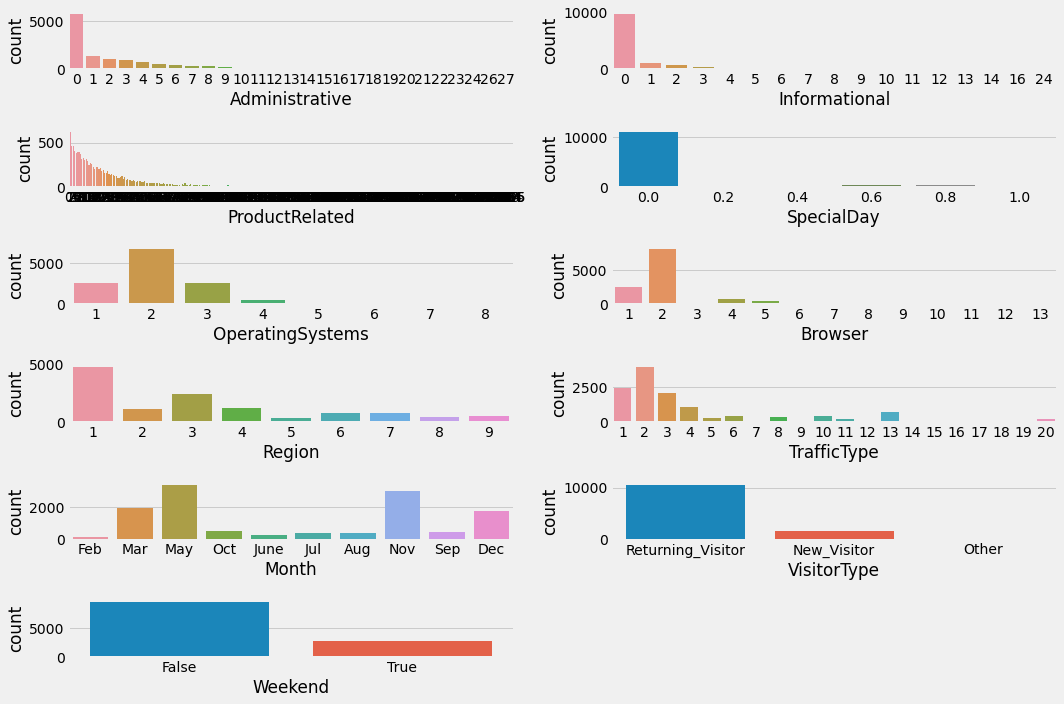

In [17]:
col=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']
c=1
plt.figure(figsize=(15,10))
for i in col:
    ax=plt.subplot(6,2,c)
    sns.countplot(x=df[i],ax=ax)
    c=c+1
    plt.tight_layout()
    

In [19]:
#repeated visit is for product related page
#operating system 2 has high usage
#from region 1 high number of visitor
#march,may,nov,dec shows high visitor than others show some seasonility in visiting
#weekday has high number of visitors foronline shopping than weekend

Bivaraite analysis

In [20]:
#how features are having relation with target i.e revenue

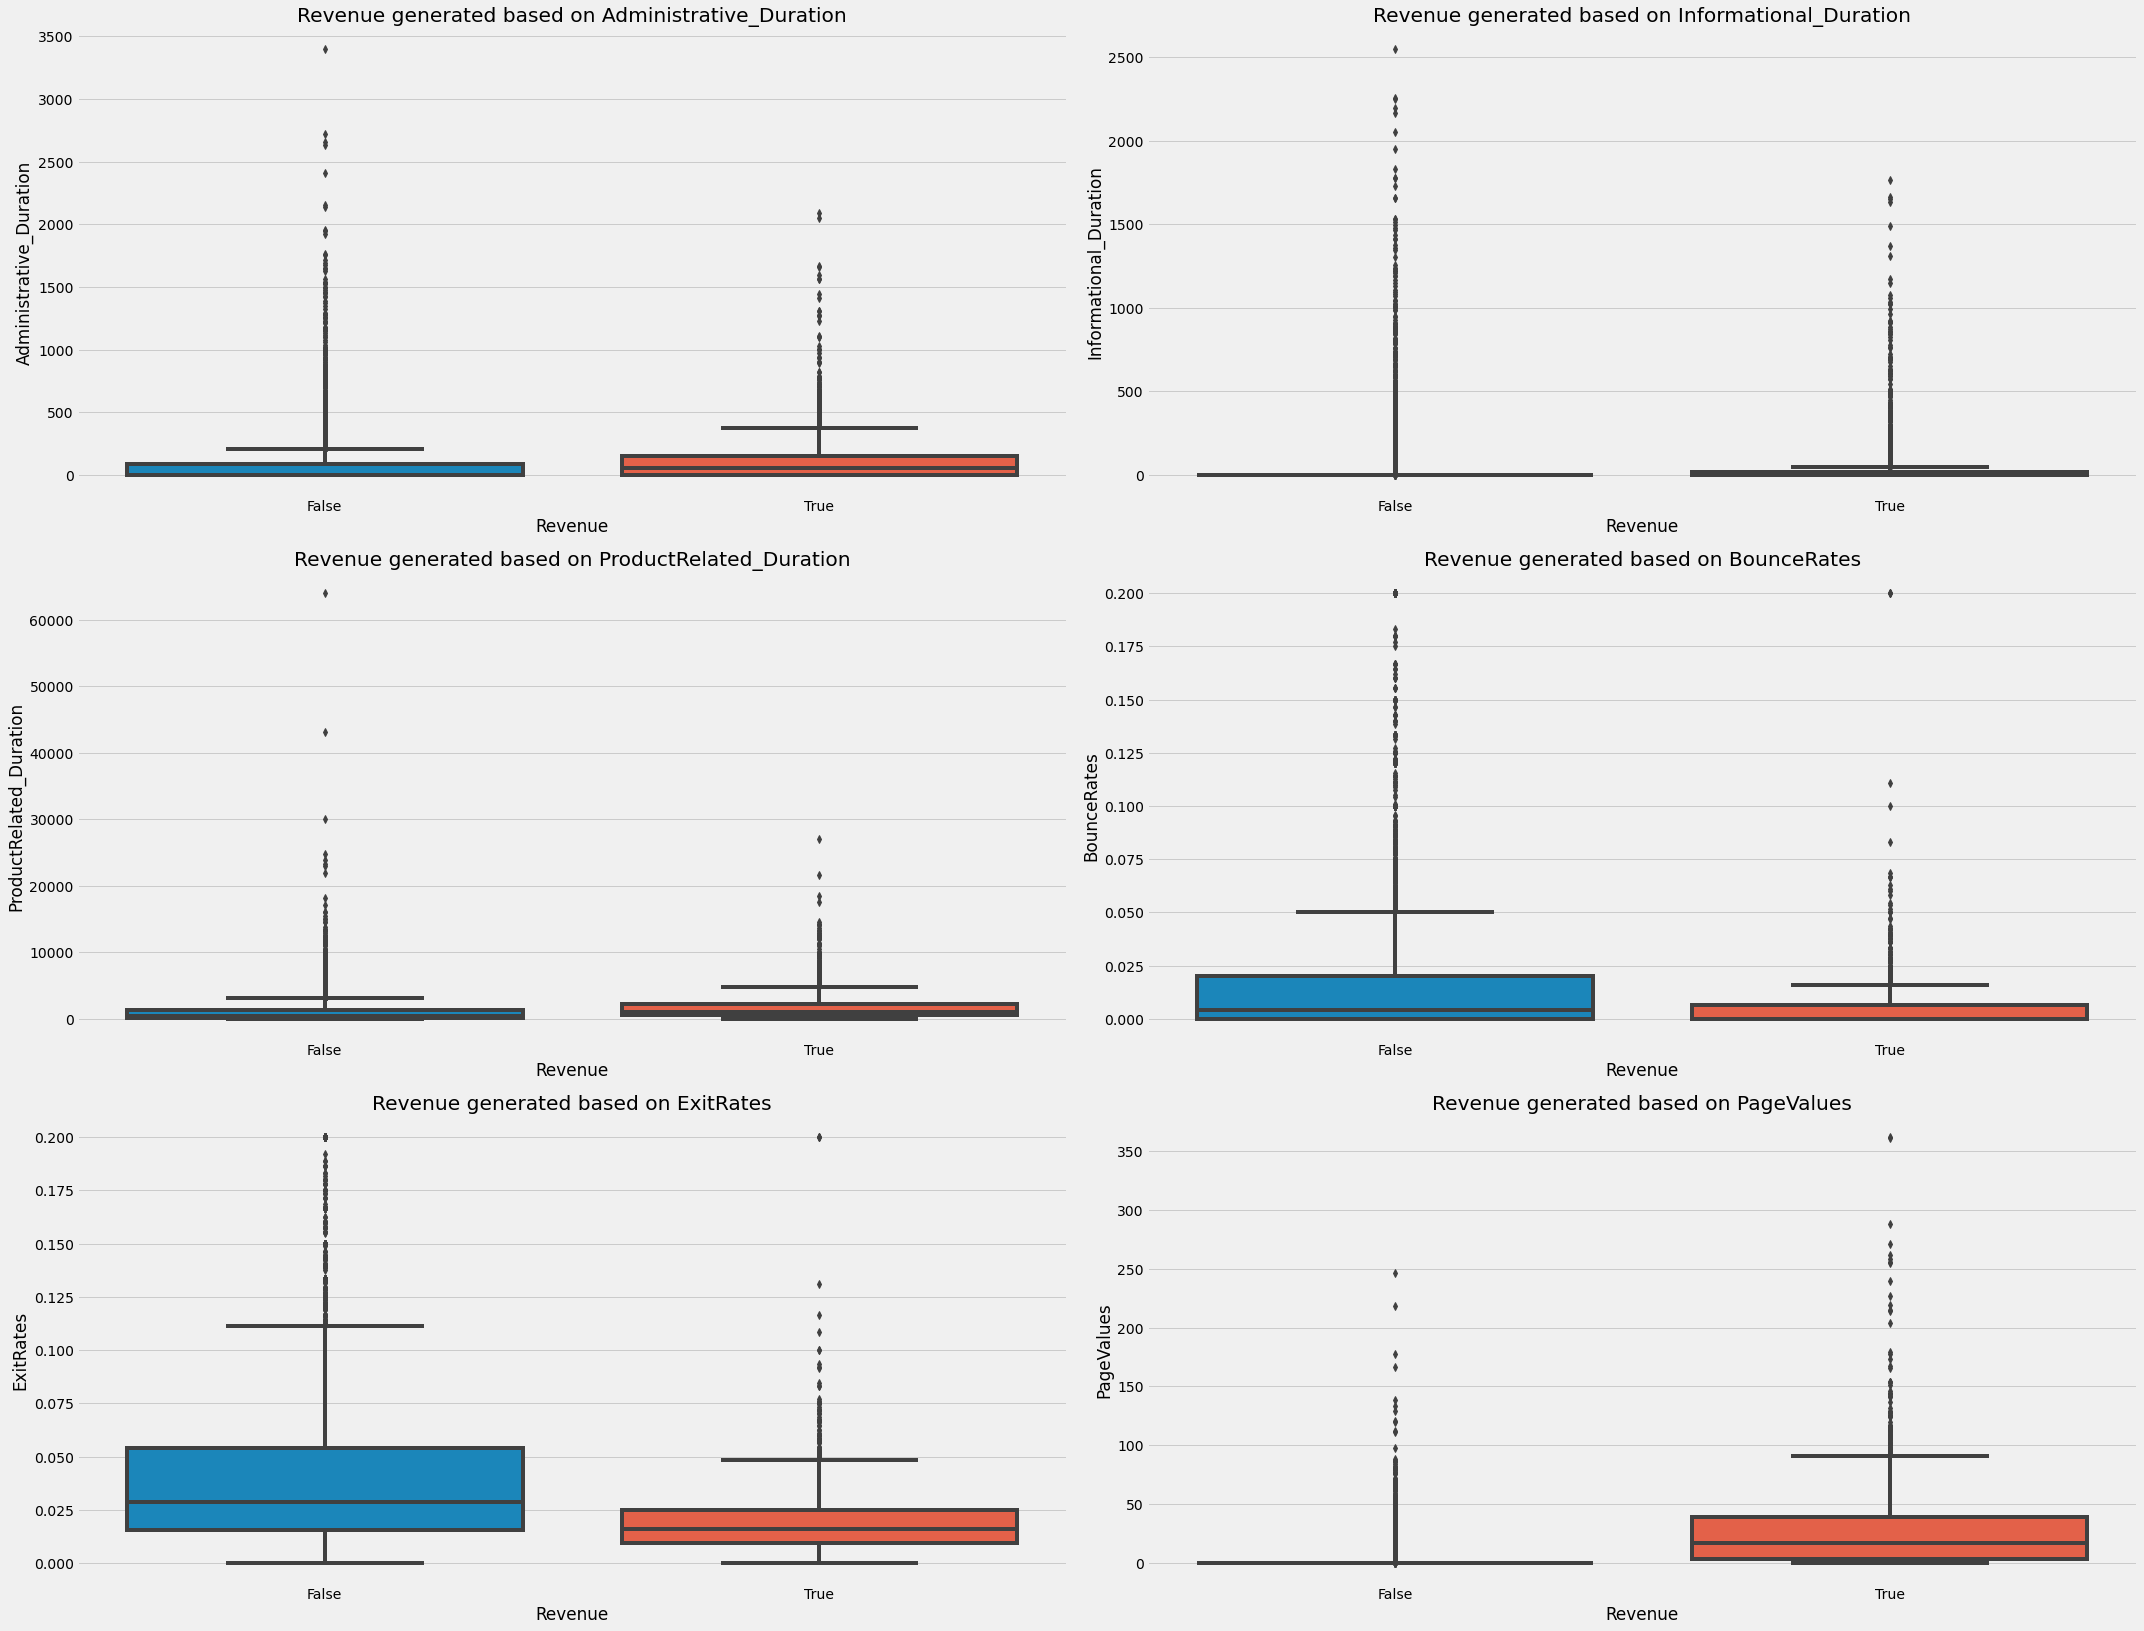

In [19]:
num=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
c=0
plt.figure(figsize=(30,45))
for i in num:
    c=c+1
    ax=plt.subplot(6,2,c)
    sns.boxplot(y=df[i],x=df['Revenue'],ax=ax)
    ax.set_title('Revenue generated based on '+i)
    plt.tight_layout()



In [20]:
#revenue generated by administrative page is slightly high than revenue not genrated by that page,shows the page is somehow 
#profitable,this is same with respect to information related page
#with respect to product related the revenue is neither profit nor loss
#

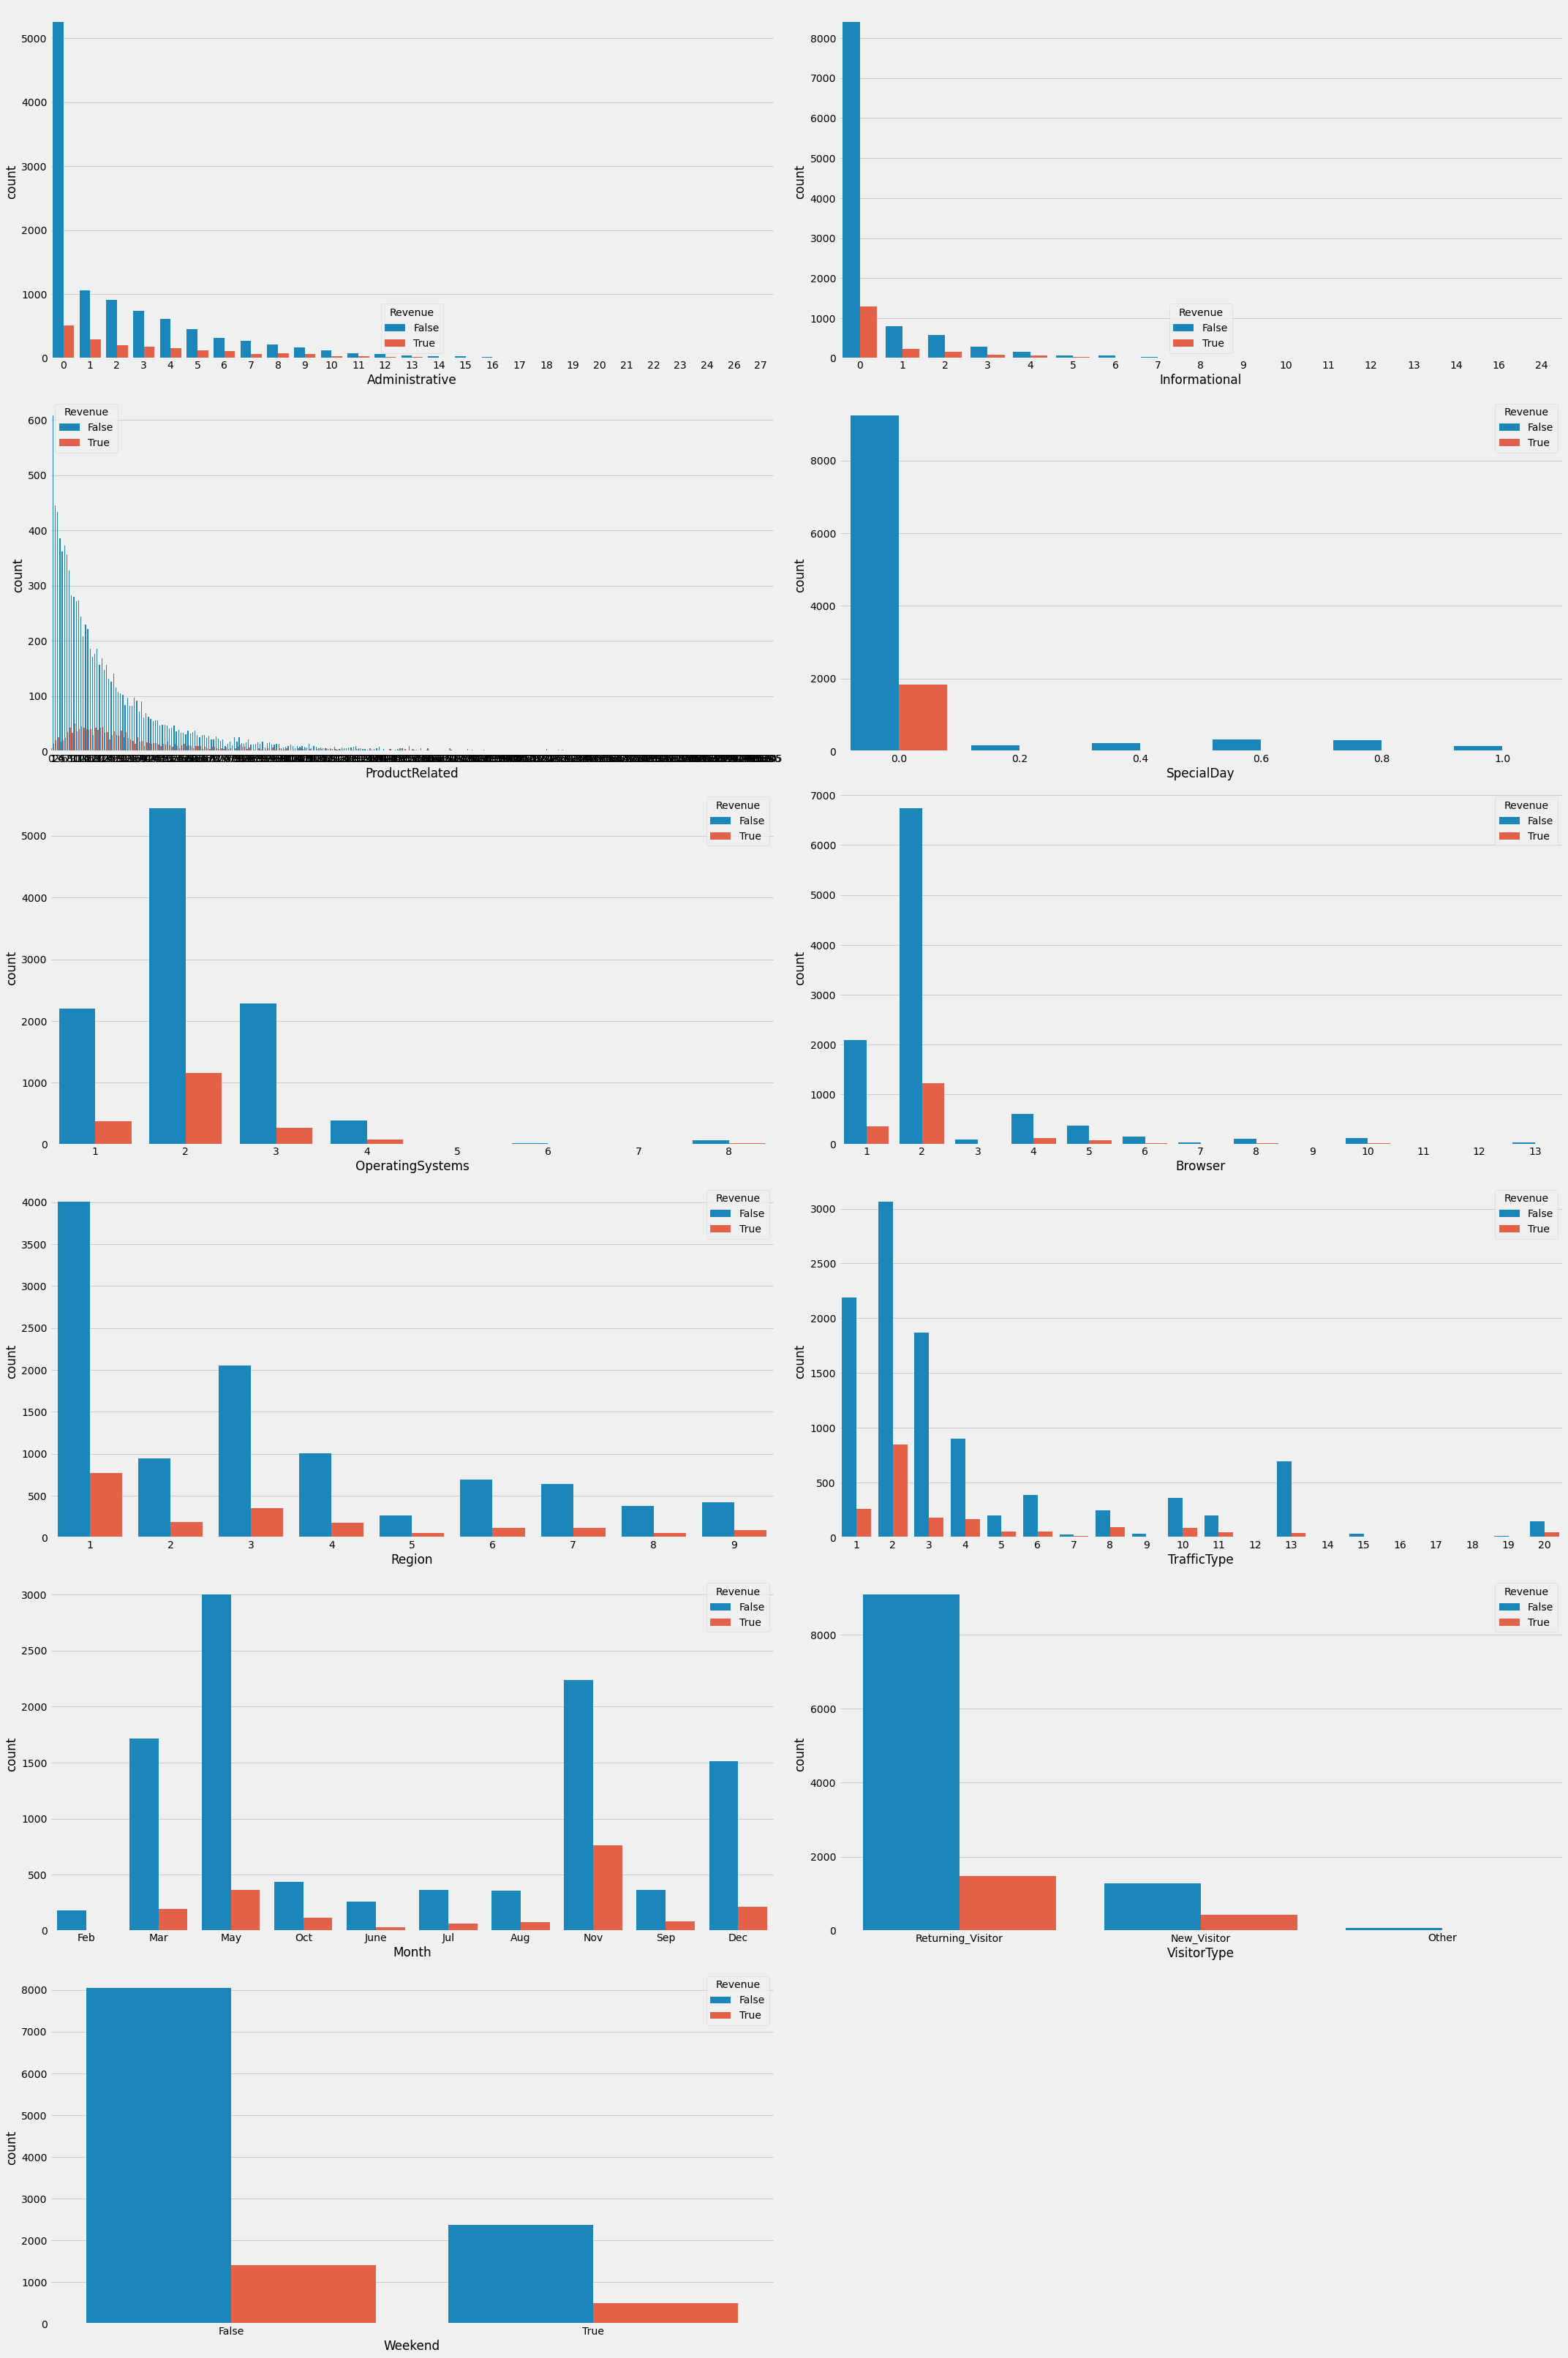

In [21]:
col=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']
c=0
plt.figure(figsize=(30,45))
for i in col:
    c=c+1
    ax=plt.subplot(6,2,c)
    sns.countplot(x=df[i],hue=df['Revenue'],ax=ax)
    plt.tight_layout()

Multivariate Analysis

In [5]:
import plotly.express as px

In [6]:
fig=px.scatter(data_frame=df,x='BounceRates',y='ExitRates',hover_name='ProductRelated',color='Revenue')
fig.show()

Outlier Detection

In [27]:
for i in num:
    m=np.mean(df[i])
    s=np.std(df[i])
    thresh=3
    z=(df[i]-m)/s
    outlier=[x for x in np.abs(z) if x>thresh]
    print(i)
    print('outlier count',len(outlier))
    print('percentage of outliers',len(outlier)/df[i].shape[0]*100)
    print()
    

Administrative_Duration
outlier count 232
percentage of outliers 1.8815896188158963

Informational_Duration
outlier count 230
percentage of outliers 1.8653690186536902

ProductRelated_Duration
outlier count 219
percentage of outliers 1.7761557177615572

BounceRates
outlier count 708
percentage of outliers 5.742092457420925

ExitRates
outlier count 713
percentage of outliers 5.78264395782644

PageValues
outlier count 259
percentage of outliers 2.1005677210056772



In [28]:
#there are outliers,we already seen it in the box plot also

In [29]:
df1=df.copy()
df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [30]:
#labelencoding
from sklearn.preprocessing import LabelEncoder

In [31]:
LE=LabelEncoder()

In [32]:
df1['Weekend']=LE.fit_transform(df1['Weekend'])
df1['Revenue']=LE.fit_transform(df1['Revenue'])

In [33]:
df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

In [34]:
for i in ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']:
    df1[i]=df1[i].astype('object')

In [35]:
dum=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
dummy=pd.get_dummies(df1[dum],drop_first=True)

In [36]:
dummy

Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0              0          1          0           0          0          0   
1              0          1          0           0          0          0   
2              0          1          0           0          0          0   
3              0          1          0           0          0          0   
4              0          1          0           0          0          0   
...          ...        ...        ...         ...        ...        ...   
12325          1          0          0           0          0          0   
12326          0          0          0           0          0          0   
12327          0          0          0           0          0          0   
12328          0          0          0           0          0          0   
12329          0          0          0           0          0          0   

       Month_Nov  Month_Oct  Month_Sep  OperatingSystems_2  ...  \
0              0          0          0                   0  ...   
1              0          0          0                   1  ...   
2              0          0          0                   0  ...   
3              0          0          0                   0  ...   
4              0          0          0                   0  ...   
...          ...        ...        ...                 ...  ...   
12325          0          0          0                   0  ...   
12326          1          0          0                   0  ...   
12327          1          0          0                   0  ...   
12328          1          0          0                   1  ...   
12329          1          0          0                   0  ...   

       TrafficType_13  TrafficType_14  TrafficType_15  TrafficType_16  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
12325               0               0               0               0   
12326               0               0               0               0   
12327               1               0               0               0   
12328               0               0               0               0   
12329               0               0               0               0   

       TrafficType_17  TrafficType_18  TrafficType_19  TrafficType_20  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
12325               0               0               0               0   
12326               0               0               0               0   
12327               0               0               0               0   
12328               0               0               0               0   
12329               0               0               0               0   

       VisitorType_Other  VisitorType_Returning_Visitor  
0                      0                              1  
1                      0                              1  
2                      0                              1  
3                      0                              1  
4                      0                              1  
...                  ...                            ...  
12325                  0                              1  
12326                  0                              1  
12327        

In [37]:
df1=df1.drop(columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType'])
df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  
0         0.20       0.20         0.0         0.0        0        0  
1         0.00       0.10         0.0         0.0        0        0  
2         0.20       0.20         0.0         0.0        0        0  
3         0.05       0.14         0.0         0.0        0        0  
4         0.02       0.05         0.0         0.0        1        0

In [38]:
df_f=pd.concat([df1,dummy],axis=1)
df_f.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_13  \
0         0.20       0.20         0.0         0.0  ...               0   
1         0.00       0.10         0.0         0.0  ...               0   
2         0.20       0.20         0.0         0.0  ...               0   
3         0.05       0.14         0.0         0.0  ...               0   
4         0.02       0.05         0.0         0.0  ...               0   

   TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_Other  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  

[5 rows x 69 columns]

Multicollinearity

<AxesSubplot:>

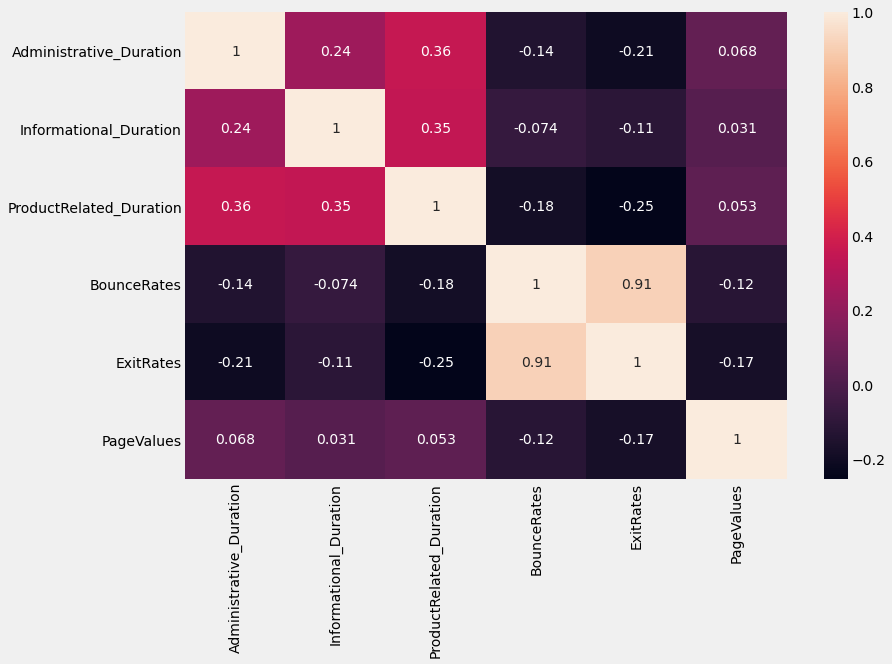

In [39]:
sns.heatmap(df_f[num].corr(),annot=True)

In [40]:
#there is no multicollinearity

Clustering

In [41]:
X=df_f.drop(columns='Revenue')
Y=df_f.Revenue

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss=StandardScaler()

In [44]:
X_sc=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

KMeans clustering

In [45]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

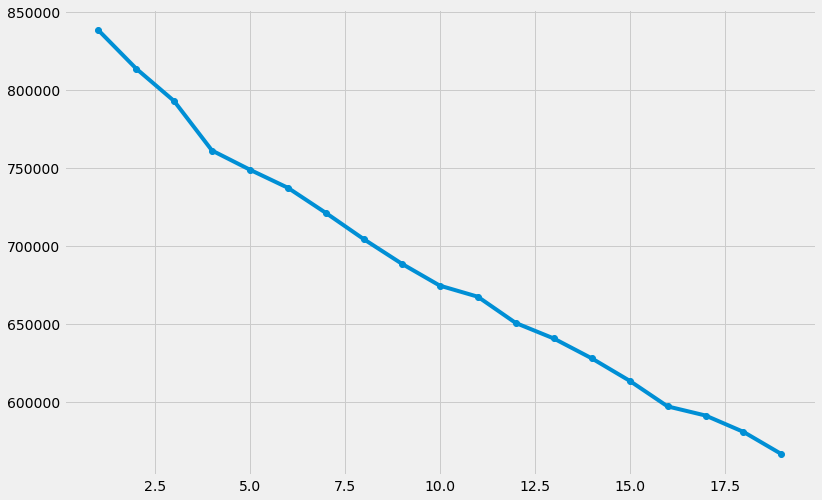

In [46]:
#optimal no of cluster
err=[]
for i in range(1,20):
    km=KMeans(i,random_state=10)
    km.fit(X_sc)
    err.append(km.inertia_)
plt.plot(range(1,20),err,marker='o')
plt.show()

In [48]:
for i in range(2,15):
    km=KMeans(i,random_state=10)
    sil=silhouette_score(X_sc,km.fit_predict(X_sc))
    print('for cluster {} silhoutte score: {:.4f}'.format(i,sil))

for cluster 2 silhoutte score: 0.0675
for cluster 3 silhoutte score: 0.0797
for cluster 4 silhoutte score: 0.0880
for cluster 5 silhoutte score: 0.0903
for cluster 6 silhoutte score: 0.0544
for cluster 7 silhoutte score: 0.0631
for cluster 8 silhoutte score: 0.0590
for cluster 9 silhoutte score: 0.0672
for cluster 10 silhoutte score: 0.0702
for cluster 11 silhoutte score: 0.0627
for cluster 12 silhoutte score: 0.0462
for cluster 13 silhoutte score: 0.0606
for cluster 14 silhoutte score: 0.0764


In [62]:
#optimal cluster 5

In [49]:
km=KMeans(5,random_state=10)
km.fit(X_sc)

KMeans(n_clusters=5, random_state=10)

In [50]:
df_k=X.copy()

In [51]:
df_k['Revenue']=km.labels_

In [52]:
df_k.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_14  \
0         0.20       0.20         0.0         0.0  ...               0   
1         0.00       0.10         0.0         0.0  ...               0   
2         0.20       0.20         0.0         0.0  ...               0   
3         0.05       0.14         0.0         0.0  ...               0   
4         0.02       0.05         0.0         0.0  ...               0   

   TrafficType_15  TrafficType_16  TrafficType_17  TrafficType_18  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_19  TrafficType_20  VisitorType_Other  \
0               0               0                  0   
1               0               0                  0   
2               0               0                  0   
3               0               0                  0   
4               0               0                  0   

   VisitorType_Returning_Visitor  Revenue  
0                              1        3  
1                              1        1  
2                              1        3  
3                              1        3  
4                              1        1  

[5 rows x 69 columns]

Agglomerative clustering

In [53]:
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist

In [54]:
for i in ['single','complete','average','ward']:
    z=linkage(X_sc,i)
    c,v=cophenet(z,pdist(X_sc))
    print('for linkage ',i,'cophenet score:',c)
    

for linkage  single cophenet score: 0.9461522823205845
for linkage  complete cophenet score: 0.8830512573137812
for linkage  average cophenet score: 0.9656793851117655
for linkage  ward cophenet score: 0.4249398368772434


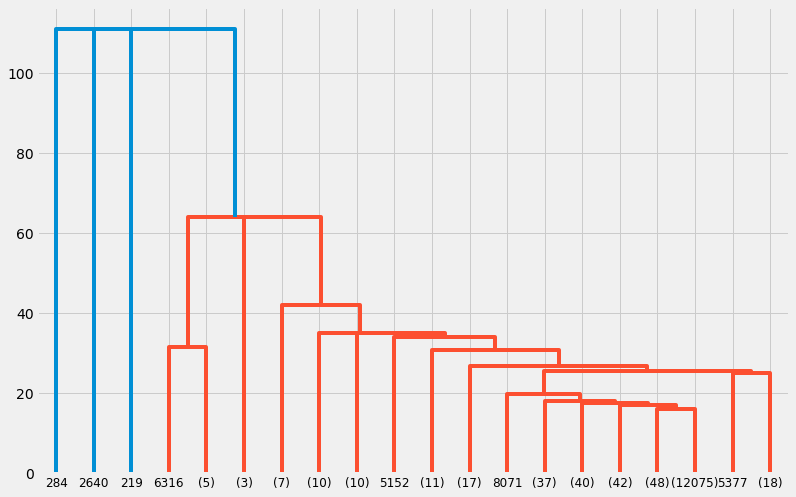

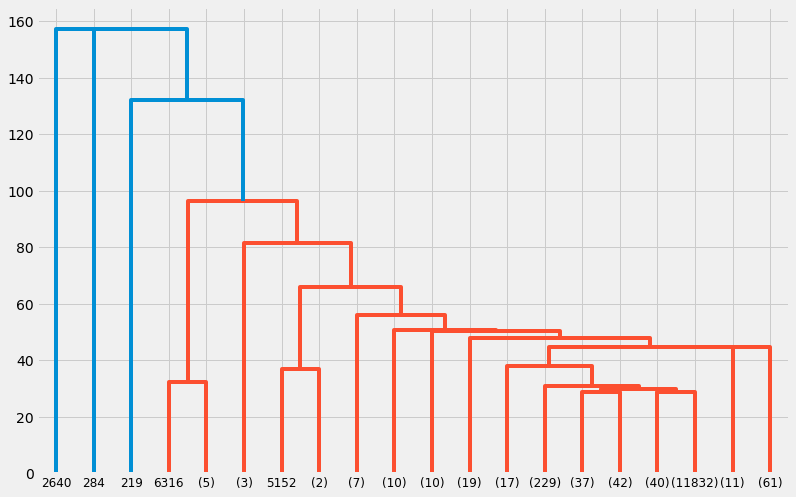

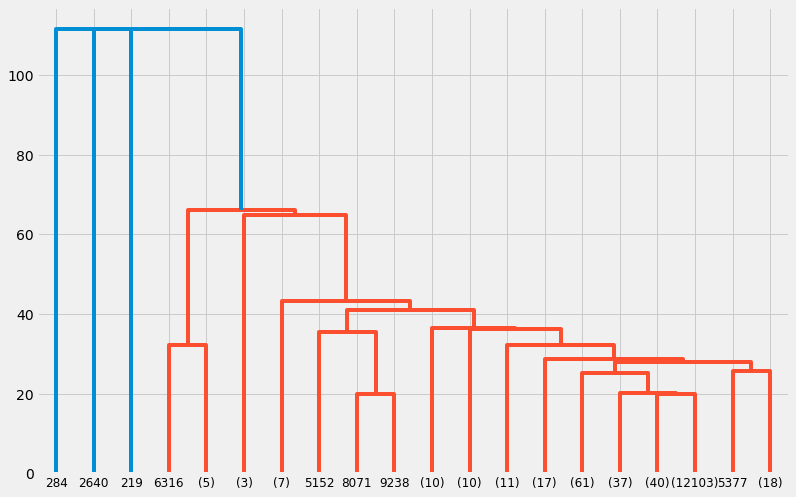

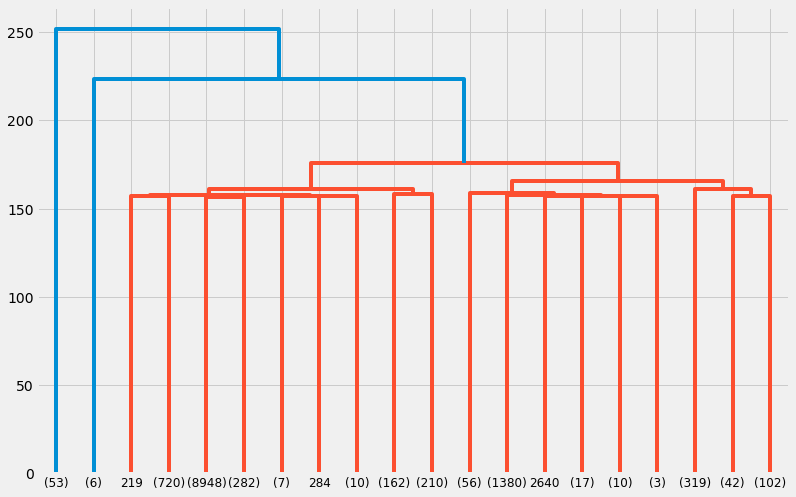

In [55]:
for i in ['single','complete','average','ward']:
    z=linkage(X_sc,i)
    dendrogram(z,p=20,truncate_mode='lastp')
    plt.show()

In [127]:
for i in range(2,15):
    agg=AgglomerativeClustering(i)
    sil=silhouette_score(X_sc,agg.fit_predict(X_sc))
    print('for cluster {} silhoutte score: {:.4f}'.format(i,sil))

for cluster 2 silhoutte score: 0.6116
for cluster 3 silhoutte score: 0.6129
for cluster 4 silhoutte score: 0.1530
for cluster 5 silhoutte score: 0.1269
for cluster 6 silhoutte score: 0.1332
for cluster 7 silhoutte score: 0.1393
for cluster 8 silhoutte score: 0.1154
for cluster 9 silhoutte score: 0.1223
for cluster 10 silhoutte score: 0.0858
for cluster 11 silhoutte score: 0.0918
for cluster 12 silhoutte score: 0.0958
for cluster 13 silhoutte score: 0.0966
for cluster 14 silhoutte score: 0.0977


In [128]:
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(X_sc)

AgglomerativeClustering(n_clusters=3)

In [129]:
df_agg=X.copy()

In [130]:
df_agg['Revenue']=agg.labels_

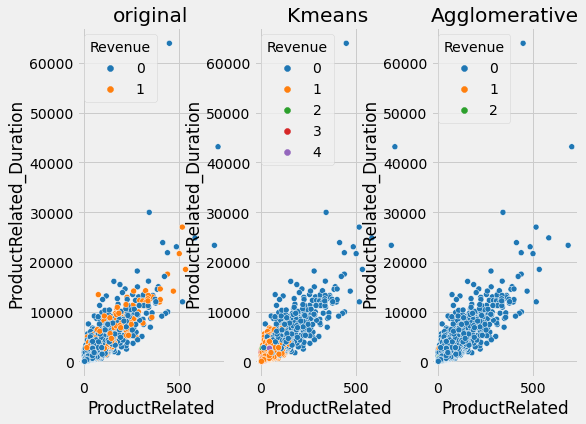

In [131]:
plt.figure(figsize=(8,6))
ax=plt.subplot(1,3,1)
sns.scatterplot(x=df_f['ProductRelated'],y=df_f['ProductRelated_Duration'],hue=Y,palette='tab10',ax=ax)
plt.title('original')
ax1=plt.subplot(1,3,2)
sns.scatterplot(x=df_k['ProductRelated'],y=df_k['ProductRelated_Duration'],hue=df_k['Revenue'],palette='tab10',ax=ax1)
plt.title('Kmeans')
ax2=plt.subplot(1,3,3)
sns.scatterplot(x=df_agg['ProductRelated'],y=df_agg['ProductRelated_Duration'],hue=df_agg['Revenue'],palette='tab10',ax=ax2)
plt.title('Agglomerative')
plt.show()

In [ ]:
#kmeans doing slightly good job then agglomerative,but still we cannot clearly see the cluster division
#we will go for PCA as no of features is high 

PCA

In [56]:
X.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_13  \
0         0.20       0.20         0.0         0.0  ...               0   
1         0.00       0.10         0.0         0.0  ...               0   
2         0.20       0.20         0.0         0.0  ...               0   
3         0.05       0.14         0.0         0.0  ...               0   
4         0.02       0.05         0.0         0.0  ...               0   

   TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_Other  \
0               0               0               0                  0   
1               0               0               0                  0   
2               0               0               0                  0   
3               0               0               0                  0   
4               0               0               0                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  

[5 rows x 68 columns]

In [57]:
df_sc=ss.fit_transform(X)

In [58]:
#covariance matrix
cov_mat=np.cov(df_sc.T)

In [59]:
#eigen 
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [60]:
#eig_val
eig_val

array([ 3.64400447e+00,  3.10028603e+00,  2.14545342e+00,  2.04550718e+00,
        1.97570775e+00,  1.72678495e+00,  1.63296217e+00,  4.21572671e-02,
        4.29530401e-02,  7.41476303e-02,  1.21477683e-01, -7.75102610e-17,
        2.00486660e-01,  2.10958549e-01,  3.38396122e-01,  3.46416331e-01,
        4.15446669e-01,  4.21813483e-01,  4.93823160e-01,  5.01717838e-01,
        1.40175703e+00,  6.02188357e-01,  1.33261823e+00,  1.30811433e+00,
        1.27339090e+00,  6.93836513e-01,  7.25717734e-01,  7.52070750e-01,
        7.90794720e-01,  1.19128643e+00,  1.18424265e+00,  1.16624520e+00,
        8.43749940e-01,  8.51763929e-01,  1.14476680e+00,  1.13250383e+00,
        1.11649451e+00,  8.88584438e-01,  1.10440796e+00,  9.02393583e-01,
        9.10651702e-01,  1.09456509e+00,  9.24787412e-01,  1.08395545e+00,
        1.07693496e+00,  1.07436348e+00,  9.38991492e-01,  1.05634183e+00,
        1.04724132e+00,  1.04673132e+00,  1.03612248e+00,  1.03166045e+00,
        9.55052262e-01,  

In [61]:
eig_vec

array([[-0.35147526,  0.03178852, -0.10737057, ...,  0.02040376,
        -0.00131051, -0.00052159],
       [-0.29580027,  0.03136648, -0.13410718, ...,  0.00755796,
         0.01194446, -0.00290948],
       [-0.31490648,  0.00832794, -0.21506945, ..., -0.05757355,
        -0.03101995,  0.00149097],
       ...,
       [ 0.04898255,  0.36050421, -0.09020307, ..., -0.03835046,
        -0.00270815,  0.01959234],
       [ 0.06496628,  0.45509453, -0.10226172, ...,  0.0221011 ,
        -0.01105182,  0.01219394],
       [ 0.0137386 , -0.18288982, -0.24502852, ..., -0.00924755,
        -0.00365205, -0.01797518]])

In [62]:
var_per=sorted(eig_val,reverse=True)/sum(eig_val)*100
var_per

array([ 5.35839548e+00,  4.55887439e+00,  3.15482267e+00,  3.00785482e+00,
        2.90521693e+00,  2.53918367e+00,  2.40122020e+00,  2.06124021e+00,
        1.95957375e+00,  1.92354153e+00,  1.87248180e+00,  1.75174973e+00,
        1.74139206e+00,  1.71492738e+00,  1.68334405e+00,  1.66531173e+00,
        1.64177053e+00,  1.62399763e+00,  1.60952399e+00,  1.59392285e+00,
        1.58359944e+00,  1.57981815e+00,  1.55331787e+00,  1.53993586e+00,
        1.53918592e+00,  1.52358595e+00,  1.51702468e+00,  1.50097467e+00,
        1.48994237e+00,  1.47977516e+00,  1.47880327e+00,  1.47195952e+00,
        1.47055273e+00,  1.46401079e+00,  1.45471042e+00,  1.44931553e+00,
        1.44431737e+00,  1.43978483e+00,  1.43229646e+00,  1.42596446e+00,
        1.41297561e+00,  1.40738794e+00,  1.40437471e+00,  1.38075785e+00,
        1.35987119e+00,  1.33908507e+00,  1.32694176e+00,  1.30663584e+00,
        1.25249242e+00,  1.24070810e+00,  1.16283909e+00,  1.10589670e+00,
        1.06714541e+00,  

In [71]:
cum_per=np.cumsum(var_per)
cum_per

array([  5.35839548,   9.91726987,  13.07209255,  16.07994737,
        18.9851643 ,  21.52434798,  23.92556818,  25.98680838,
        27.94638213,  29.86992366,  31.74240546,  33.49415519,
        35.23554725,  36.95047463,  38.63381867,  40.2991304 ,
        41.94090094,  43.56489856,  45.17442256,  46.76834541,
        48.35194485,  49.931763  ,  51.48508087,  53.02501673,
        54.56420265,  56.08778859,  57.60481327,  59.10578795,
        60.59573032,  62.07550548,  63.55430875,  65.02626827,
        66.496821  ,  67.96083179,  69.41554221,  70.86485774,
        72.30917511,  73.74895994,  75.1812564 ,  76.60722086,
        78.02019647,  79.4275844 ,  80.83195912,  82.21271697,
        83.57258816,  84.91167322,  86.23861498,  87.54525082,
        88.79774325,  90.03845135,  91.20129044,  92.30718714,
        93.37433255,  94.39459761,  95.2800969 ,  96.01785741,
        96.74400904,  97.36427268,  97.97517411,  98.48456857,
        98.98216957,  99.29237757,  99.58718698,  99.76

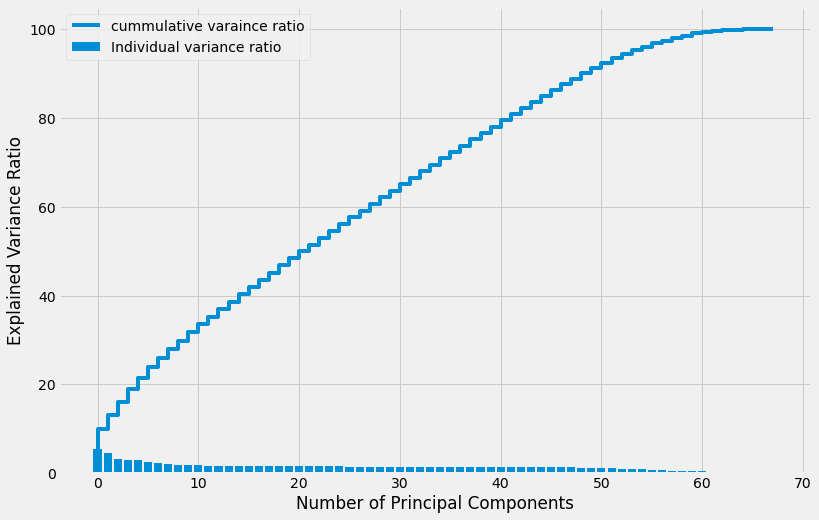

In [69]:
plt.bar(range(len(var_per)),var_per,label='Individual variance ratio')
plt.step(range(len(cum_per)),cum_per,label='cummulative varaince ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend()
plt.show()

In [72]:
#out of 68 features 55 features itself giving 95% varaince

In [73]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA()
pca.fit(df_sc)

PCA()

In [77]:
pca.explained_variance_ratio_

array([5.35839548e-02, 4.55887439e-02, 3.15482267e-02, 3.00785482e-02,
       2.90521693e-02, 2.53918367e-02, 2.40122020e-02, 2.06124021e-02,
       1.95957375e-02, 1.92354153e-02, 1.87248180e-02, 1.75174973e-02,
       1.74139206e-02, 1.71492738e-02, 1.68334405e-02, 1.66531173e-02,
       1.64177053e-02, 1.62399763e-02, 1.60952399e-02, 1.59392285e-02,
       1.58359944e-02, 1.57981815e-02, 1.55331787e-02, 1.53993586e-02,
       1.53918592e-02, 1.52358595e-02, 1.51702468e-02, 1.50097467e-02,
       1.48994237e-02, 1.47977516e-02, 1.47880327e-02, 1.47195952e-02,
       1.47055273e-02, 1.46401079e-02, 1.45471042e-02, 1.44931553e-02,
       1.44431737e-02, 1.43978483e-02, 1.43229646e-02, 1.42596446e-02,
       1.41297561e-02, 1.40738794e-02, 1.40437471e-02, 1.38075785e-02,
       1.35987119e-02, 1.33908507e-02, 1.32694176e-02, 1.30663584e-02,
       1.25249242e-02, 1.24070810e-02, 1.16283909e-02, 1.10589670e-02,
       1.06714541e-02, 1.02026506e-02, 8.85499290e-03, 7.37760511e-03,
      

In [80]:
np.cumsum(pca.explained_variance_ratio_*100)

array([  5.35839548,   9.91726987,  13.07209255,  16.07994737,
        18.9851643 ,  21.52434798,  23.92556818,  25.98680838,
        27.94638213,  29.86992366,  31.74240546,  33.49415519,
        35.23554725,  36.95047463,  38.63381867,  40.2991304 ,
        41.94090094,  43.56489856,  45.17442256,  46.76834541,
        48.35194485,  49.931763  ,  51.48508087,  53.02501673,
        54.56420265,  56.08778859,  57.60481327,  59.10578795,
        60.59573032,  62.07550548,  63.55430875,  65.02626827,
        66.496821  ,  67.96083179,  69.41554221,  70.86485774,
        72.30917511,  73.74895994,  75.1812564 ,  76.60722086,
        78.02019647,  79.4275844 ,  80.83195912,  82.21271697,
        83.57258816,  84.91167322,  86.23861498,  87.54525082,
        88.79774325,  90.03845135,  91.20129044,  92.30718714,
        93.37433255,  94.39459761,  95.2800969 ,  96.01785741,
        96.74400904,  97.36427268,  97.97517411,  98.48456857,
        98.98216957,  99.29237757,  99.58718698,  99.76

In [81]:
pca=PCA(.95)
df_pca=pca.fit_transform(df_sc)

In [83]:
df_pca=pd.DataFrame(df_pca)
df_pca.head()

0         1         2         3         4         5         6   \
0 -3.905609 -0.670807  1.543569  0.267808 -0.240866  3.302507  1.508099   
1 -1.338891 -0.494070 -0.732421 -0.345811  0.231876  1.179842 -0.669346   
2 -4.353224  0.504259  1.661491  0.169922  0.097542  4.033762  3.110849   
3 -2.710266 -1.027653  1.757281  0.129324 -0.103176 -0.222181  0.777133   
4 -2.196161 -0.750360  1.257766  0.608801 -0.809173 -1.661810  4.679626   

         7         8         9   ...        45        46        47        48  \
0 -0.765868 -1.756008  0.557216  ... -2.751785  1.893160 -1.855030 -0.778119   
1 -0.346083 -0.390505  0.710822  ... -3.111274  2.095499 -1.402997 -1.173895   
2 -0.030959 -0.943719 -0.734725  ... -1.284929  1.771834 -2.488413 -4.234579   
3 -0.824712 -0.024828 -0.778518  ... -3.020245  1.616709 -1.003598 -0.641270   
4 -0.580771  1.034492  0.470519  ... -1.459304  2.943440 -3.390933 -1.569950   

         49        50        51        52        53        54  
0 -0.158778 -0.360560 -0.435485  0.118318 -0.613286  0.197086  
1  0.008392 -0.595998  0.158308  0.501337 -0.242969 -0.018612  
2 -0.824787 -1.298621 -0.079550 -0.017385 -0.642785  1.038515  
3  0.622832 -0.886194 -1.729971  0.349213 -1.152191  0.896520  
4 -1.290991 -0.628459  2.286780  2.975138 -1.442262  0.415224  

[5 rows x 55 columns]

In [84]:
#KMeans clustering for PCA

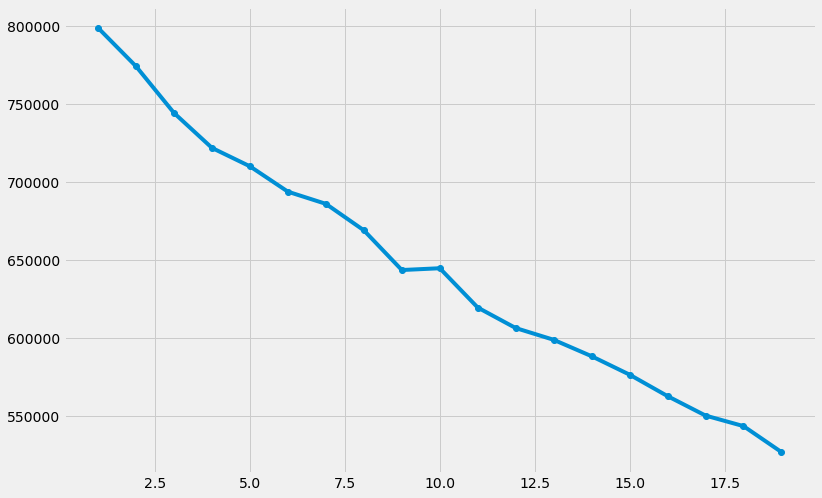

In [85]:
#optimal no of cluster
err=[]
for i in range(1,20):
    km=KMeans(i,random_state=10)
    km.fit(df_pca)
    err.append(km.inertia_)
plt.plot(range(1,20),err,marker='o')
plt.show()

In [86]:
for i in range(2,15):
    km=KMeans(i,random_state=10)
    sil=silhouette_score(df_pca,km.fit_predict(df_pca))
    print('for cluster {} silhoutte score: {:.4f}'.format(i,sil))

for cluster 2 silhoutte score: 0.0650
for cluster 3 silhoutte score: 0.1018
for cluster 4 silhoutte score: 0.0859
for cluster 5 silhoutte score: 0.0904
for cluster 6 silhoutte score: 0.0928
for cluster 7 silhoutte score: 0.0820
for cluster 8 silhoutte score: 0.0599
for cluster 9 silhoutte score: 0.0559
for cluster 10 silhoutte score: 0.0650
for cluster 11 silhoutte score: 0.0702
for cluster 12 silhoutte score: 0.0593
for cluster 13 silhoutte score: 0.0700
for cluster 14 silhoutte score: 0.0991


In [62]:
#optimal cluster 3

In [132]:
km=KMeans(3,random_state=10)
km.fit(df_pca)

KMeans(n_clusters=3, random_state=10)

In [133]:
df_k_pca=df_pca.copy()

In [134]:
df_k_pca['Revenue']=km.labels_

In [135]:
df_k_pca.head()

0         1         2         3         4         5         6  \
0 -3.905609 -0.670807  1.543569  0.267808 -0.240866  3.302507  1.508099   
1 -1.338891 -0.494070 -0.732421 -0.345811  0.231876  1.179842 -0.669346   
2 -4.353224  0.504259  1.661491  0.169922  0.097542  4.033762  3.110849   
3 -2.710266 -1.027653  1.757281  0.129324 -0.103176 -0.222181  0.777133   
4 -2.196161 -0.750360  1.257766  0.608801 -0.809173 -1.661810  4.679626   

          7         8         9  ...        46        47        48        49  \
0 -0.765868 -1.756008  0.557216  ...  1.893160 -1.855030 -0.778119 -0.158778   
1 -0.346083 -0.390505  0.710822  ...  2.095499 -1.402997 -1.173895  0.008392   
2 -0.030959 -0.943719 -0.734725  ...  1.771834 -2.488413 -4.234579 -0.824787   
3 -0.824712 -0.024828 -0.778518  ...  1.616709 -1.003598 -0.641270  0.622832   
4 -0.580771  1.034492  0.470519  ...  2.943440 -3.390933 -1.569950 -1.290991   

         50        51        52        53        54  Revenue  
0 -0.360560 -0.435485  0.118318 -0.613286  0.197086        0  
1 -0.595998  0.158308  0.501337 -0.242969 -0.018612        1  
2 -1.298621 -0.079550 -0.017385 -0.642785  1.038515        0  
3 -0.886194 -1.729971  0.349213 -1.152191  0.896520        0  
4 -0.628459  2.286780  2.975138 -1.442262  0.415224        0  

[5 rows x 56 columns]

Agglomerative clustering

In [93]:
for i in ['single','complete','average','ward']:
    z=linkage(df_pca,i)
    c,v=cophenet(z,pdist(df_pca))
    print('for linkage ',i,'cophenet score:',c)
    

for linkage  single cophenet score: 0.924685628976562
for linkage  complete cophenet score: 0.8372691949086207
for linkage  average cophenet score: 0.9626833542011414
for linkage  ward cophenet score: 0.4268043116081782


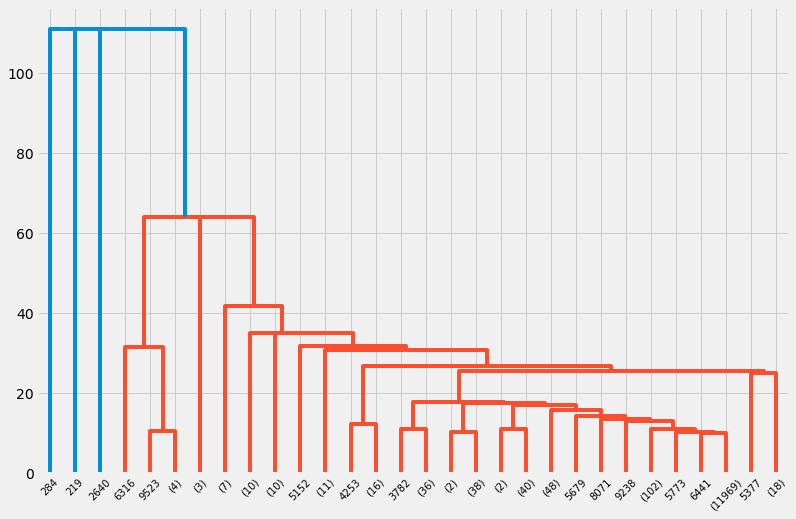

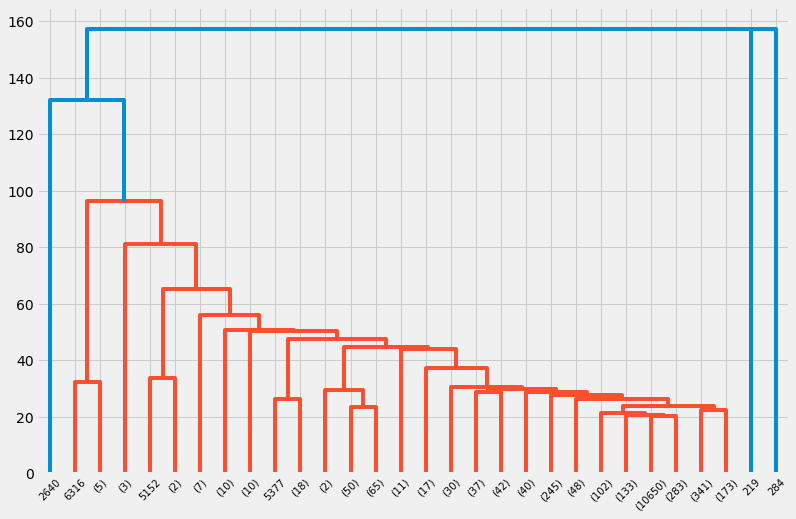

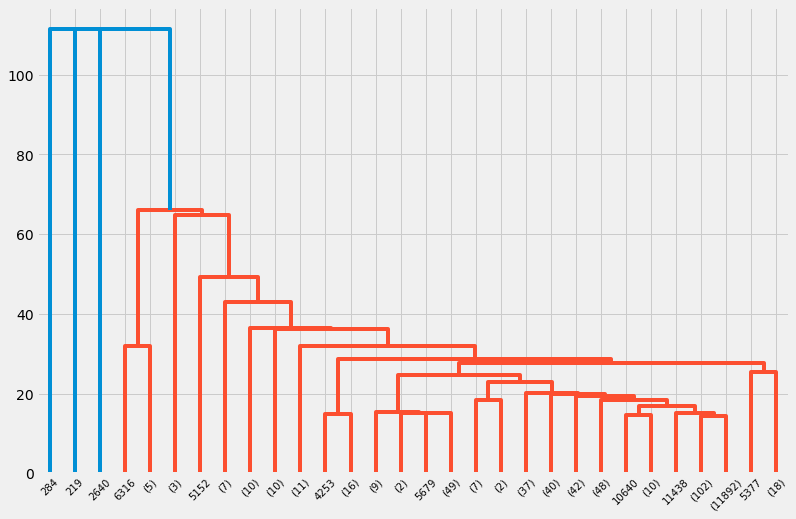

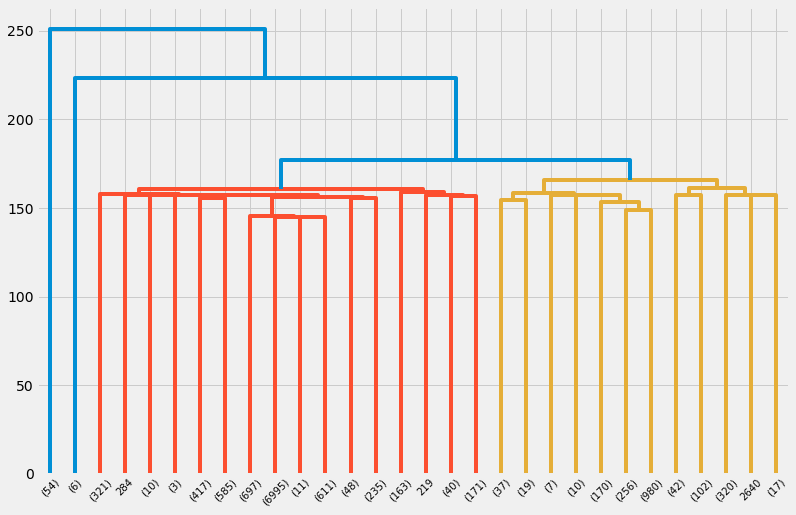

In [96]:
for i in ['single','complete','average','ward']:
    z=linkage(df_pca,i)
    dendrogram(z,p=30,truncate_mode='lastp')
    plt.show()

In [137]:
for i in range(2,6):
    agg=AgglomerativeClustering(i)
    sil=silhouette_score(df_pca,agg.fit_predict(df_pca))
    print('for cluster {} silhoutte score: {:.4f}'.format(i,sil))

for cluster 2 silhoutte score: 0.6181
for cluster 3 silhoutte score: 0.6195
for cluster 4 silhoutte score: 0.1626
for cluster 5 silhoutte score: 0.1206


In [151]:
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(X_sc)

AgglomerativeClustering(n_clusters=3)

In [148]:
df_agg_pca=df_pca.copy()

In [149]:
df_agg_pca['Revenue']=agg.labels_

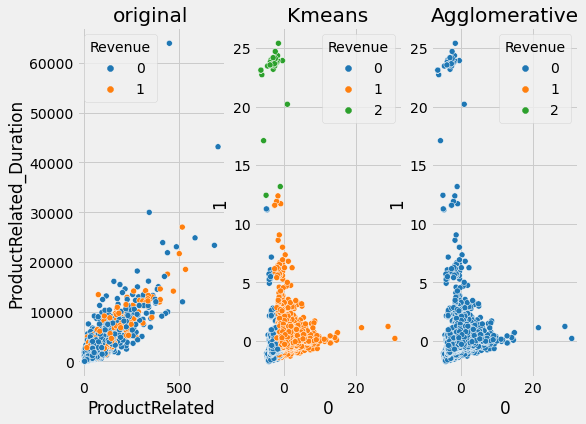

In [150]:
plt.figure(figsize=(8,6))
ax=plt.subplot(1,3,1)
sns.scatterplot(x=df_f['ProductRelated'],y=df_f['ProductRelated_Duration'],hue=Y,palette='tab10',ax=ax)
plt.title('original')
ax1=plt.subplot(1,3,2)
sns.scatterplot(x=df_k_pca[0],y=df_k_pca[1],hue=df_k_pca['Revenue'],palette='tab10',ax=ax1)
plt.title('Kmeans')
ax2=plt.subplot(1,3,3)
sns.scatterplot(x=df_agg_pca[0],y=df_agg_pca[1],hue=df_agg_pca['Revenue'],palette='tab10',ax=ax2)
plt.title('Agglomerative')
plt.show()

In [ ]:
#kmeans clustering performing good on pca
#pca helps in reducing the cost of multi dimension

In [ ]:
#classification model on original dataset

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
X=df_f.drop(columns='Revenue')
Y=df_f.Revenue

In [165]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [166]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [156]:
rf=RandomForestClassifier()
kf=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf,x_train,y_train,cv=kf,scoring='roc_auc')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.93819286 0.91446182 0.91639617 0.93273739 0.92675509]
bias error 0.07429133618264083
variance error 0.010241670241880942


In [ ]:
#the model consistency is good
#let's compare with PCA and see pca has increased the accuracy or not

PCA Kmeans clustering dataset

In [176]:
X=df_k_pca.drop(columns='Revenue')
Y=df_k_pca.Revenue

In [177]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [178]:
rf=RandomForestClassifier()
kf=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf,x_train,y_train,cv=kf,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.98673227 0.98447217 0.97975123 0.9839513  0.97811199]
bias error 0.017396206011585535
variance error 0.003558944632350846


In [ ]:
#PCA has done a good job, as we can see the accuracy of model is good and consistent as well

RF hyperparameter tuning for original dataset

In [170]:
params={'n_estimators':range(1,100),'criterion':['gini','entropy']}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gd=GridSearchCV(RandomForestClassifier(),params,cv=kf,scoring='roc_auc')
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy', 'n_estimators': 90}

In [171]:
rf=RandomForestClassifier(n_estimators=90,criterion='entropy')
kf=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf,x_train,y_train,cv=kf,scoring='roc_auc')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.93564005 0.91619401 0.91684097 0.92874864 0.9297356 ]
bias error 0.07456814646733534
variance error 0.008556744842251156


In [ ]:
#hyper parameter tuning has no effect on original dataset,the varaince error is reduced

RF hyperparameter tuning for PCA dataset

In [175]:
params={'n_estimators':range(1,100),'criterion':['gini','entropy']}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gd=GridSearchCV(RandomForestClassifier(),params,cv=kf,scoring='f1_weighted')
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy', 'n_estimators': 80}

In [180]:
rf=RandomForestClassifier(n_estimators=80,criterion='entropy')
kf=KFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(rf,x_train,y_train,cv=kf,scoring='f1_weighted')
print(score)
print('bias error',1-np.mean(score))
print('variance error',np.std(score,ddof=1))

[0.98709335 0.98661539 0.98125521 0.98604894 0.97965567]
bias error 0.015866286210351355
variance error 0.003425091044046983


In [ ]:
#hyperparameter tuning has no effect 

Inference

In [ ]:
#dimensionality reduction with PCA has helped for both clustering and classification
#Kmeans clustering with 3 clusters has segmented the visitors good
#average model accuracy is 98%